In [1]:
import pickle

In [2]:
# Importing ndarray dictionaries from pickel file
file_path = "./data/mel_spectrogram_crop.pickle"
with open (file_path, 'rb') as f:
    data = pickle.load(f)

In [3]:
type(data)

dict

In [4]:
for num, num_vec in data.items():
    for vec in num_vec:
        print(vec.shape)

(128, 25)
(128, 28)
(128, 15)
(128, 11)
(128, 31)
(128, 28)
(128, 32)
(128, 36)
(128, 22)
(128, 18)
(128, 28)
(128, 25)
(128, 39)
(128, 27)
(128, 18)
(128, 21)
(128, 30)
(128, 23)
(128, 22)
(128, 20)
(128, 24)
(128, 34)
(128, 40)
(128, 38)
(128, 17)
(128, 13)
(128, 37)
(128, 16)
(128, 13)
(128, 32)
(128, 19)
(128, 19)
(128, 13)
(128, 26)
(128, 27)
(128, 20)
(128, 30)
(128, 39)
(128, 19)
(128, 30)
(128, 21)
(128, 18)
(128, 18)
(128, 20)
(128, 20)
(128, 20)
(128, 32)
(128, 18)
(128, 28)
(128, 15)
(128, 16)
(128, 24)
(128, 14)
(128, 34)
(128, 15)
(128, 35)
(128, 17)
(128, 28)
(128, 13)
(128, 22)
(128, 16)
(128, 24)
(128, 16)
(128, 18)
(128, 17)
(128, 15)
(128, 34)
(128, 21)
(128, 25)
(128, 13)
(128, 17)
(128, 6)
(128, 34)
(128, 36)
(128, 29)
(128, 15)
(128, 14)
(128, 9)
(128, 29)
(128, 32)
(128, 17)
(128, 22)
(128, 25)
(128, 17)
(128, 24)
(128, 31)
(128, 20)
(128, 29)
(128, 32)
(128, 16)
(128, 20)
(128, 19)
(128, 18)
(128, 29)
(128, 14)
(128, 39)
(128, 10)
(128, 14)
(128, 10)
(128, 28)
(1

In [5]:

import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
# Flatten the arrays to feed to SVM model
# true data has 286 list elements and each elememt is a numpy ndarray of size (128,41)
X = [vec.flatten() for num, num_vec in data.items() for vec in num_vec]
y = np.array([num for num, num_vec in data.items() for vec in num_vec], dtype = np.float32)

In [7]:
len(y)

240

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf  = make_pipeline(StandardScaler(),SVC(kernel='linear', C=12, decision_function_shape='ovr'))
clf.fit(X_train, y_train)

In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

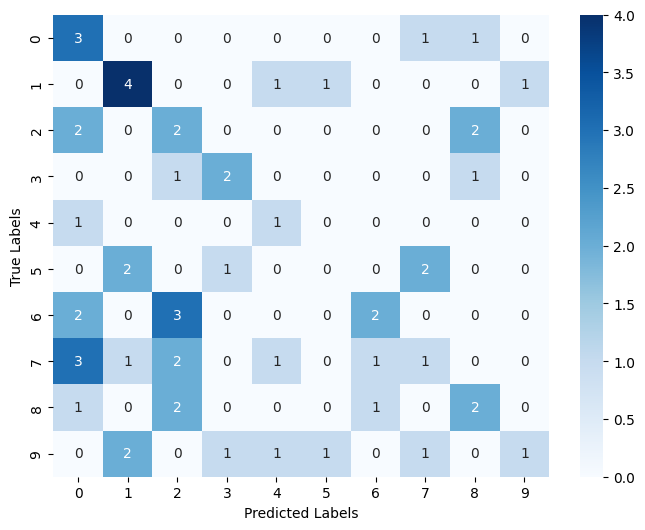

              precision    recall  f1-score   support

           0       0.25      0.60      0.35         5
           1       0.44      0.57      0.50         7
           2       0.20      0.33      0.25         6
           3       0.50      0.50      0.50         4
           4       0.25      0.50      0.33         2
           5       0.00      0.00      0.00         5
           6       0.50      0.29      0.36         7
           7       0.20      0.11      0.14         9
           8       0.33      0.33      0.33         6
           9       0.50      0.14      0.22         7

    accuracy                           0.31        58
   macro avg       0.32      0.34      0.30        58
weighted avg       0.33      0.31      0.29        58



In [19]:
# Evaluate model
y_pred = clf.predict(X_test)
accuracy = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Create a classification report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] # replace with your actual class names
print(classification_report(y_test, y_pred, target_names=target_names))